In [21]:
import os
import io
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import tweepy

%matplotlib inline

In [2]:
# setting up API keys as environmental variables
consumer_key = os.environ['api_key']
consumer_secret = os.environ['api_secret_key']
access_token = os.environ['access_token']
access_secret = os.environ['access_token_secret']

In [2]:
csv_file_name = 'twitter-archive-enhanced.csv'

In [3]:
udacity_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

## Gather

In [4]:
df_tweets = pd.read_csv(csv_file_name)

In [5]:
image_data = requests.get(udacity_url).content

In [6]:
df_images = pd.read_csv(io.StringIO(image_data.decode('utf-8')), sep='\t')

In [4]:
# Set up tweepy with credentials.
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [45]:
# will fail without authorization 
with open('tweet_json.txt', 'w') as file:
    for id in df_tweets['tweet_id']:
        try:
            tweet_info = api.get_status(id, tweet_mode='extended')
            json.dump(tweet_info._json, file)
            # ensure each entry on a new line
            file.write('\n')
        except tweepy.TweepError:
            # if it is not possible to find a tweet do nothing
            pass

Rate limit reached. Sleeping for: 508


In [7]:
tweets_data = []
with open('tweet_json.txt') as file:
    for line in file:
        # get rid of \n when adding to a list of dicts
        tweets_data.append(json.loads(line.replace('\n', '')))

In [8]:
# load twitter api data to Pandas
df_tweets_data = pd.DataFrame(tweets_data)

In [9]:
len(df_tweets_data), len(df_tweets)

(2340, 2356)

We've downloaded via API data on almost all of the tweets in the original DataFrame.

## Assess

Let's check what we've got in df_tweets:

In [9]:
df_tweets.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [40]:
df_tweets.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


Let's check if datatypes are apropriate:

In [10]:
df_tweets.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

Let's check what we have in non null rows in replies:

In [11]:
df_tweets[~df_tweets['in_reply_to_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


Looks like 'source' is type of tweeter client used:

In [12]:
df_tweets['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

Let's check some expanded_urls:

In [13]:
df_tweets.iloc[10]['expanded_urls']

'https://twitter.com/dog_rates/status/890006608113172480/photo/1,https://twitter.com/dog_rates/status/890006608113172480/photo/1'

It seems that in some cases url is duplicated.

Checking 'dog stage' columns:

In [14]:
columns = ['doggo', 'floofer', 'pupper', 'puppo']

In [15]:
for column in columns:
    print(df_tweets[column].value_counts())

None     2259
doggo      97
Name: doggo, dtype: int64
None       2346
floofer      10
Name: floofer, dtype: int64
None      2099
pupper     257
Name: pupper, dtype: int64
None     2326
puppo      30
Name: puppo, dtype: int64


Let's check names:

In [16]:
df_tweets['name'].value_counts()

None           745
a               55
Charlie         12
Lucy            11
Cooper          11
Oliver          11
Tucker          10
Lola            10
Penny           10
Bo               9
Winston          9
the              8
Sadie            8
Buddy            7
an               7
Daisy            7
Toby             7
Bailey           7
Jack             6
Koda             6
Jax              6
Scout            6
Milo             6
Stanley          6
Leo              6
Bella            6
Oscar            6
Rusty            6
Dave             6
Phil             5
              ... 
Chesterson       1
Chef             1
Scott            1
such             1
Fiji             1
Maisey           1
Pawnd            1
Julio            1
Carll            1
Chase            1
Sweets           1
General          1
Obie             1
Christoper       1
Ruffles          1
Aubie            1
Aldrick          1
William          1
Charl            1
Lilli            1
Geoff            1
Shakespeare 

Dog names like 'a', 'the', 'an' are not valid names. Also absent data was marked as a string 'None' which is also not apropriate.

Now let's check ratings:

In [28]:
df_tweets['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [33]:
df_tweets['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

Because WeRateDogs uses quite an unique ratings system it is very hard to assess it's correctness however we can assume that denominator larger than 10 is a mistake, for example this [tweet](https://twitter.com/dog_rates/status/740373189193256964/photo/1) has rating 9/11 however this is actually a date and true rating is 14/10.

In conclusion let's check if we have duplicated rows:

In [39]:
len(df_tweets[df_tweets.duplicated()])

0

Let's check df_images:

In [24]:
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
df_images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [19]:
df_images.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

Let's check what breeds we have:

In [42]:
columns = ['p1', 'p2', 'p3']
for column in columns:
    print(df_images[column].value_counts())

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Staffordshire_bullterrier     20
Siberian_husky                20
German_shepherd               20
web_site                      19
Cardigan                      19
beagle                        18
Eskimo_dog                    18
Shetland_sheepdog             18
teddy                         18
Maltese_dog                   18
Lakeland_terrier              17
Rottweiler                    17
Shih-Tzu                      17
kuvasz                        16
Italian_greyhound             16
          

With dog breed we got some other items like 'lifeboat', 'barbershop' etc but this is to be expected it seems that image recognition model is not limited to dogs. What we can notice here is that some dog breeds capitalised and some are not i.e. 'miniature_poodle' and 'Siberian_husky'.

Let's check how image classifer actually worked:

In [23]:
df_images[df_images['p1_dog'] == False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,1.459380e-02,False,golden_retriever,7.958960e-03,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,2.784070e-01,True,groenendael,1.026430e-01,True
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,1.041090e-01,True,dingo,6.207120e-02,False
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,1.671750e-01,True,Chihuahua,8.695060e-02,True


It seems that WeRateDogs posts not only dogs but other animals too here is a [turtle](https://twitter.com/dog_rates/status/666051853826850816)

Anyway for the purpose of this project out of three columns we need only one with actually dogs in it.

In [43]:
df_images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [45]:
columns = ['p1_dog', 'p2_dog', 'p3_dog']
for column in columns:
    print(df_images[column].value_counts())

True     1532
False     543
Name: p1_dog, dtype: int64
True     1553
False     522
Name: p2_dog, dtype: int64
True     1499
False     576
Name: p3_dog, dtype: int64


Let's check for duplicates:

In [47]:
len(df_images[df_images.duplicated()])

0

Let's see what we've abtained via twitter-API:

In [11]:
df_tweets_data.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status_permalink', 'retweet_count', 'retweeted',
       'retweeted_status', 'source', 'truncated', 'user'],
      dtype='object')

In [15]:
df_tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 32 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2340 non-null object
display_text_range               2340 non-null object
entities                         2340 non-null object
extended_entities                2067 non-null object
favorite_count                   2340 non-null int64
favorited                        2340 non-null bool
full_text                        2340 non-null object
geo                              0 non-null object
id                               2340 non-null int64
id_str                           2340 non-null object
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null object
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null obj

We got a bunch of data on individual tweets, but most interesting to us is retweet_count and favorite_count:

In [17]:
df_tweets_data[['id', 'retweet_count','favorite_count']].sample(5)

,id,retweet_count,favorite_count
1894,674416750885273600,146,700
38,884876753390489601,5491,27416
544,803692223237865472,8170,0
81,876838120628539392,3283,20338
1147,723688335806480385,3167,8029


In [18]:
df_tweets_data[['retweet_count', 'favorite_count']].describe()

,retweet_count,favorite_count
count,2340.000000,2340.000000
mean,2928.622222,7960.525214
std,4933.774449,12328.813228
min,0.000000,0.000000
25%,587.750000,1371.750000
50%,1367.500000,3460.500000
75%,3412.750000,9740.000000
max,83635.000000,164249.000000


df_tweets_data seems to be a clean and tidy dataset atleast in parts which matter for this project.

### Quality

<ul>
    <li><b>For the tweet archive:</b></li>
    <li>Timestamp is a string, should be datetime object</li>
    <li>Id's in in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id and retweeted_status_user_id are floats should be integers</li>
    <li>Tags in source column do not contribute usefull info, needs to be changed to iphone, vine, web, tweetdeck</li>
    <li>Some names are obviously invalid like 'a', 'the', 'an'</li>
    <li>Missing values in names column labeled as string 'None'</li>
    <li>Rating denominators should be not larger than 10</li>
    <li>Missing values in 'dog stages' labeled as string 'None'</li>
    <li><b>For image prediction DataFrame:</b></li>
    <li>Some dog breed capitalised and some are not</li>
    <li>Out of three columns we need only one - actually with a dog breed in it</li>
</ul>

### Tidiness

<ul>
    <li><b>For the tweet archive:</b></li>
    <li>In expanded urls some of the url's are duplicated</li>
    <li>Columns 'doggo', 'floofer', 'pupper', 'puppo' are realy just one variable: dog stage as per Dogtionary</li>
    <li>Replies and retweets are present</li>
    <li>Since we have a single unit of observation - tweet we should put all info in one DataFrame (merging all three DataFrames together)</li>
</ul>

## Clean

First we have to deal with tidiness issues than move to quality issues.

### Define

Merge all three data sets together.

### Clean

In [10]:
df_tweets_data_clean = df_tweets_data.copy()
# Rename id column for merging.
df_tweets_data_clean.rename(index=str, columns={'id': 'tweet_id'}, inplace=True)

In [11]:
# merge with data from twitter API
df_twitter_archive_master = pd.merge(df_tweets,
                                     df_tweets_data_clean[['tweet_id', 'retweet_count', 'favorite_count']],
                                     how='left')

In [103]:
# merge with image data
df_twitter_archive_master = pd.merge(df_twitter_archive_master, df_images)

### Test

In [104]:
df_twitter_archive_master.tail()

,index,tweet_id,timestamp,source,text,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1963,2351,666049248165822465,2015-11-16 00:24:50,iphone,Here we have a 1949 1st generation vulpix. Enj...,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,...,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
1964,2352,666044226329800704,2015-11-16 00:04:52,iphone,This is a purebred Piers Morgan. Loves to Netf...,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,...,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
1965,2353,666033412701032449,2015-11-15 23:21:54,iphone,Here is a very happy pup. Big fan of well-main...,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,...,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
1966,2354,666029285002620928,2015-11-15 23:05:30,iphone,This is a western brown Mitsubishi terrier. Up...,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,...,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
1967,2355,666020888022790149,2015-11-15 22:32:08,iphone,Here we have a Japanese Irish Setter. Lost eye...,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,NaN,...,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


Looks like successful merge If we check about 16 tweets are missing data because they were deleted at some point.

In [13]:
len(df_twitter_archive_master[df_twitter_archive_master['retweet_count'].isnull()])

16

Let's drop deleted tweets:

In [14]:
df_twitter_archive_master = df_twitter_archive_master.dropna(subset=['retweet_count', 'favorite_count']).reset_index()

But for some reason ints in favorite_count and retweet_count were converted to floats, let's convert them back to ints.

In [15]:
df_twitter_archive_master['retweet_count'] = df_twitter_archive_master['retweet_count'].astype(int)
df_twitter_archive_master['favorite_count'] = df_twitter_archive_master['favorite_count'].astype(int)

In [16]:
df_twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 20 columns):
index                         2340 non-null int64
tweet_id                      2340 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2340 non-null object
source                        2340 non-null object
text                          2340 non-null object
retweeted_status_id           167 non-null float64
retweeted_status_user_id      167 non-null float64
retweeted_status_timestamp    167 non-null object
expanded_urls                 2281 non-null object
rating_numerator              2340 non-null int64
rating_denominator            2340 non-null int64
name                          2340 non-null object
doggo                         2340 non-null object
floofer                       2340 non-null object
pupper                        2340 non-null object
puppo                         234

### Define

Replace columns 'doggo', 'floofer', 'pupper', 'puppo' with one 'dog_stage' with an appropriate dog stage in it or NaN value for missing data. Than drop 'doggo', 'floofer', 'pupper', 'puppo' columns.

### Clean

First let's define a helper function:

In [30]:
def get_dog_stage(row):
    # default value will be NaN
    dog_stage = np.nan
    if row['doggo'] == 'doggo':
        dog_stage = 'doggo'
    elif row['floofer'] == 'floofer':
        dog_stage = 'floofer'
    elif row['pupper'] == 'pupper':
        dog_stage = 'pupper'
    elif row['puppo'] == 'puppo':
        dog_stage = 'puppo'
    return dog_stage

In [31]:
df_twitter_archive_master['dog_stage'] = df_twitter_archive_master.apply(get_dog_stage, axis=1)

In [34]:
# droping columns
columns_to_drop = ['doggo', 'floofer', 'pupper', 'puppo']
df_twitter_archive_master.drop(columns_to_drop, axis=1, inplace=True)

### Test

In [35]:
df_twitter_archive_master['dog_stage'].value_counts()

pupper     221
doggo       83
puppo       23
floofer      9
Name: dog_stage, dtype: int64

In [38]:
# if no error raised columns were dropped successfully
for column in columns_to_drop:
    assert column not in df_twitter_archive_master.columns

### Define

Since we are not interested in replies or retweets let's delete them from dataframe completely and drop these columns.

### Clean

In [19]:
columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id']
for column in columns:
    df_twitter_archive_master = df_twitter_archive_master[df_twitter_archive_master[column].isnull()]
df_twitter_archive_master.drop(columns, axis=1, inplace=True)

### Test

In [20]:
# check that we didn't drop everything
len(df_twitter_archive_master)

2095

In [21]:
# How many rows we've dropped?
len(df_tweets) - len(df_twitter_archive_master)

261

### Define

Remove duplicated URL's in 'expanded_urls' by splitting string at ',' at checking each part.

### Clean

In [60]:
def clear_duplicated_url(row):
    result = row['expanded_urls']
    if result is not np.nan:
        urls = row['expanded_urls'].split(',')
        if len(urls) > 1:
            # filter duplicates
            urls = set(urls)
            result = ','.join(urls)
    return result

In [62]:
df_twitter_archive_master['expanded_urls'] = df_twitter_archive_master.apply(clear_duplicated_url, axis=1)

### Test

In [63]:
df_twitter_archive_master.iloc[10]['expanded_urls']

'https://twitter.com/dog_rates/status/890006608113172480/photo/1'

Let's move to the rest of quality issues:

### Define

Replace link tag in 'source' column with appropriate value (iphone, vine, web, tweetdeck).  

### Clean

In [64]:
# lets define a helper function
def replace_source(original):
    mapping = {'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>': 'iphone',
               '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>': 'vine',
               '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>': 'web',
               '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>': 'tweetdeck'}
    return mapping[original]

In [65]:
df_twitter_archive_master['source'] = df_twitter_archive_master['source'].apply(replace_source)

KeyError: 'iphone'

### Test

In [66]:
df_twitter_archive_master['source'].value_counts()

iphone       1963
vine           91
web            31
tweetdeck      10
Name: source, dtype: int64

### Define

Replace dog names 'a', 'the', 'an', 'None' with NaN. 

### Clean

In [67]:
df_twitter_archive_master['name'].replace({'a': np.nan, 'the': np.nan, 'an': np.nan}, inplace=True)

In [26]:
df_twitter_archive_master['name'].replace({'None': np.nan}, inplace=True)

### Test

In [68]:
len(df_twitter_archive_master[df_twitter_archive_master['name'].isna()]) # original it was 0

672

In [28]:
df_twitter_archive_master['name'].value_counts()

Lucy        11
Charlie     10
Cooper      10
Oliver      10
Tucker       9
Penny        9
Sadie        8
Lola         8
Winston      8
Daisy        7
Toby         7
Bailey       6
Jax          6
Bella        6
Oscar        6
Koda         6
Bo           6
Stanley      6
Chester      5
Leo          5
Buddy        5
Dave         5
Scout        5
Bentley      5
Louis        5
Milo         5
Rusty        5
Chip         4
Clarence     4
Winnie       4
            ..
Kobe         1
Julio        1
Hector       1
Kenzie       1
Vinnie       1
Laika        1
DonDon       1
Chloe        1
Trigger      1
Kulet        1
Gustaf       1
such         1
Ginger       1
Meera        1
Covach       1
Blue         1
Meatball     1
Brian        1
Tuck         1
Cermet       1
Maks         1
Lili         1
O            1
Angel        1
Stormy       1
Herb         1
Pilot        1
Lizzie       1
Ralpher      1
Mimosa       1
Name: name, Length: 951, dtype: int64

### Define

Convert timestamp string to datetime object.

### Clean

In [ ]:
df_twitter_archive_master['timestamp'] = pd.to_datetime(df_twitter_archive_master['timestamp'])

### Test

In [ ]:
df_twitter_archive_master['timestamp'].dtype

### Define

For rating_denominator above 10 and divisable by 10 assume that multiple dogs were given the same rating. For the rest check each tweet manually and update rating.

### Clean

In [83]:
def update_ratings(row):
    denominator = row['rating_denominator']
    numerator = row['rating_numerator']
    if denominator > 10 and denominator % 10 == 0:
        new_denominator = 10
        num_dogs = denominator / new_denominator
        new_numerator = numerator / new_denominator
    else:
        new_numerator = numerator
        new_denominator = denominator
    return int(new_numerator), int(new_denominator)

In [84]:
df_twitter_archive_master['rating_numerator'], df_twitter_archive_master['rating_denominator'] = zip(*df_twitter_archive_master.apply(update_ratings, axis=1))

In [96]:
# updating ratings manually
denominator = 'rating_denominator'
numerator = 'rating_numerator'
# actual 14/10
df_twitter_archive_master.at[1053, denominator] = 10
df_twitter_archive_master.at[1053, numerator] = 14
# actual 10/10
df_twitter_archive_master.at[1647, denominator] = 10
df_twitter_archive_master.at[1647, numerator] = 10
# actual 9/10
df_twitter_archive_master.at[2319, denominator] = 10
df_twitter_archive_master.at[2319, numerator] = 9

In [99]:
# let's drop tweet with no rating
df_twitter_archive_master.drop(505, inplace=True)

### Test

In [101]:
len(df_twitter_archive_master[df_twitter_archive_master['rating_denominator'] != 10])

0

### Define

Cast all image predictions to lower case:

### Clean

In [108]:
prediction_columns = ['p1', 'p2', 'p3']
for column in prediction_columns:
    df_twitter_archive_master[column] = df_twitter_archive_master[column].str.lower()

### Test

In [109]:
df_twitter_archive_master.p2.value_counts()

labrador_retriever                95
golden_retriever                  82
cardigan                          73
chihuahua                         43
chesapeake_bay_retriever          40
french_bulldog                    39
pomeranian                        38
toy_poodle                        36
siberian_husky                    33
miniature_poodle                  32
cocker_spaniel                    32
eskimo_dog                        27
beagle                            27
collie                            26
kuvasz                            24
pembroke                          24
italian_greyhound                 22
pekinese                          21
miniature_pinscher                20
chow                              20
american_staffordshire_terrier    20
malinois                          20
toy_terrier                       19
norwegian_elkhound                19
boston_bull                       18
samoyed                           17
staffordshire_bullterrier         17
p

### Define

Add a new column - 'dog_breed' with the breed with highest confidence from p1, p2, p3 columns. Note that columns are already sorted. After this drop all columns from images dataset.

In [111]:
df_twitter_archive_master.columns

Index(['index', 'tweet_id', 'timestamp', 'source', 'text',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'retweet_count', 'favorite_count',
       'dog_stage', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

### Clean

Again let's define a helper function:

In [113]:
def get_dog_breed(row):
    dog_breed = np.nan
    if row['p1_dog'] == True:
        dog_breed = row['p1']
    elif row['p2_dog'] == True:
        dog_breed = row['p2']
    elif row['p3_dog'] == True:
        dog_breed = row['p3']
    return dog_breed

In [114]:
df_twitter_archive_master['dog_breed'] = df_twitter_archive_master.apply(get_dog_breed, axis=1)

In [118]:
images_columns = ['jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']
df_twitter_archive_master.drop(images_columns, axis=1, inplace=True)

### Test

In [115]:
df_twitter_archive_master['dog_breed'].value_counts()

golden_retriever                  155
labrador_retriever                106
pembroke                           94
chihuahua                          90
pug                                62
toy_poodle                         50
chow                               48
pomeranian                         41
samoyed                            41
malamute                           33
chesapeake_bay_retriever           31
french_bulldog                     30
cocker_spaniel                     30
miniature_pinscher                 24
eskimo_dog                         22
german_shepherd                    21
cardigan                           21
staffordshire_bullterrier          20
beagle                             20
shih-tzu                           20
siberian_husky                     20
maltese_dog                        19
shetland_sheepdog                  18
rottweiler                         18
lakeland_terrier                   17
basset                             17
kuvasz      

Okay seems that we fixed all the issues and cleaned this dataset in the end let's drop some of the columns which we will not use for our analysis.

In [126]:
df_twitter_archive_master.columns

Index(['index', 'tweet_id', 'timestamp', 'source', 'text',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'retweet_count', 'favorite_count',
       'dog_stage', 'dog_breed'],
      dtype='object')

In [128]:
columns_to_drop = ['index', 'text', 'retweeted_status_timestamp', 'expanded_urls']
df_twitter_archive_master.drop(columns_to_drop, axis=1, inplace=True)

Let's write our cleaned data to .csv file:

In [129]:
df_twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

## Analyse

Let's load cleaned data:

In [3]:
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stage,dog_breed
0,892420643555336193,2017-08-01 16:23:56,iphone,13,10,Phineas,8316,38023,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,iphone,13,10,Tilly,6143,32647,NaN,chihuahua
2,891815181378084864,2017-07-31 00:18:03,iphone,12,10,Archie,4067,24570,NaN,chihuahua
3,891689557279858688,2017-07-30 15:58:51,iphone,13,10,Darla,8459,41377,NaN,labrador_retriever
4,891327558926688256,2017-07-29 16:00:24,iphone,12,10,Franklin,9159,39555,NaN,basset


Checking average rating:

In [5]:
average_numerator = df['rating_numerator'].mean()
average_numerator

11.68089430894309

Average retweet and favorite counts:

In [6]:
average_retweets = df['retweet_count'].mean()
average_retweets

2668.4491869918697

In [8]:
average_favorites = df['favorite_count'].mean()
average_favorites

8781.764227642276

Let's figure out what are most popular 10 breeds (according to the Udacity image recognition algorithm) posted in WeRateDogs account:

In [28]:
top_ten_breeds = df['dog_breed'].value_counts()[:10]
top_ten_breeds

golden_retriever      155
labrador_retriever    106
pembroke               94
chihuahua              90
pug                    62
toy_poodle             50
chow                   48
samoyed                41
pomeranian             41
malamute               33
Name: dog_breed, dtype: int64

Visualization:

<BarContainer object of 10 artists>

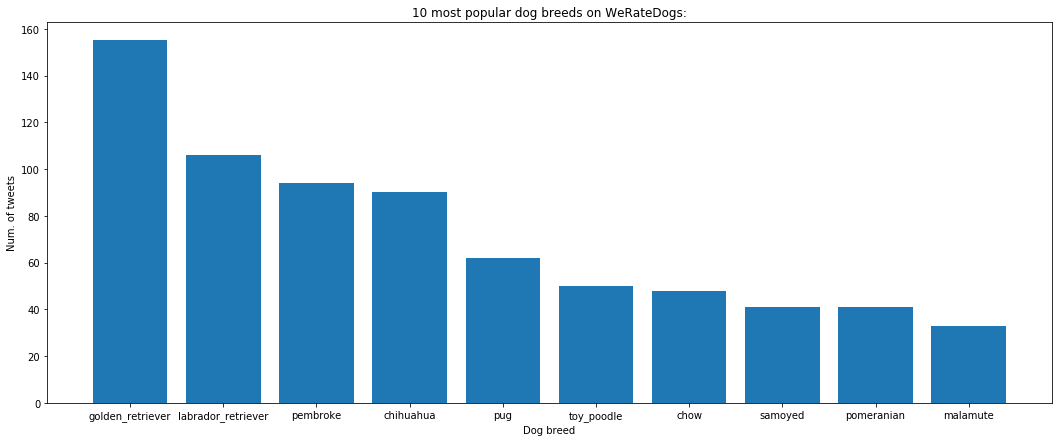

In [49]:
fig, ax = plt.subplots(figsize=(18, 7))
ax.set(xlabel='Dog breed', ylabel='Num. of tweets',
       title='10 most popular dog breeds on WeRateDogs:')
ax.bar(top_ten_breeds.index, top_ten_breeds.values)

Let's check 10 breeds with the highest average retweets:

In [43]:
top_ten_retweets = df.groupby('dog_breed')['retweet_count'].mean().sort_values(ascending=False)[:10]
top_ten_retweets

dog_breed
bedlington_terrier    7877.000000
afghan_hound          5635.333333
standard_poodle       5214.636364
french_bulldog        5163.866667
english_springer      5116.900000
saluki                4842.000000
whippet               4828.909091
cocker_spaniel        4663.500000
eskimo_dog            4555.772727
samoyed               4472.463415
Name: retweet_count, dtype: float64

<BarContainer object of 10 artists>

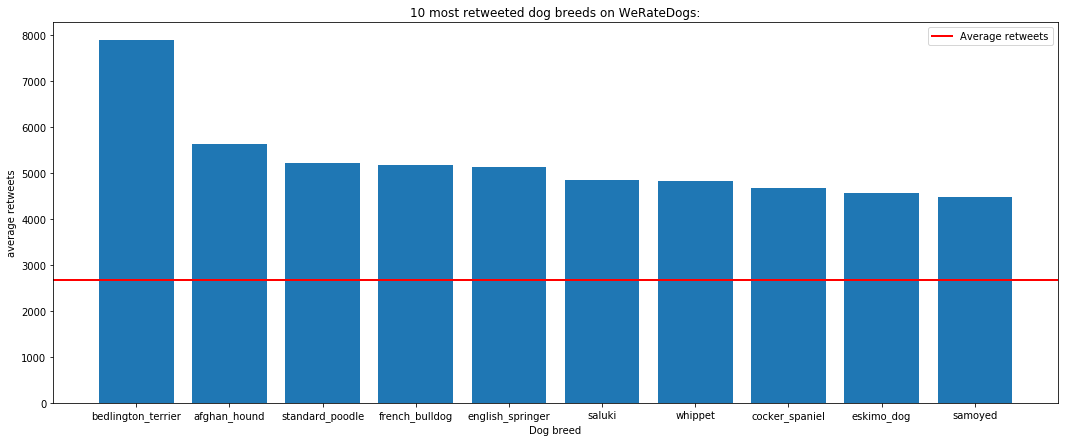

In [51]:
fig, ax = plt.subplots(figsize=(18, 7))
ax.set(xlabel='Dog breed', ylabel='average retweets',
       title='10 most retweeted dog breeds on WeRateDogs:')
ax.axhline(average_retweets, color='red', linewidth=2, label='Average retweets')
plt.legend()
ax.bar(top_ten_retweets.index, top_ten_retweets.values)

Most rated dog breeds on WeRateDogs:

In [58]:
top_ten_ratings = df.groupby('dog_breed')['rating_numerator'].mean().sort_values(ascending=False)[:10]
top_ten_ratings

dog_breed
clumber                 27.000000
bouvier_des_flandres    13.000000
pomeranian              12.536585
saluki                  12.500000
briard                  12.333333
tibetan_mastiff         12.250000
border_terrier          12.142857
silky_terrier           12.000000
standard_schnauzer      12.000000
gordon_setter           11.750000
Name: rating_numerator, dtype: float64

<BarContainer object of 10 artists>

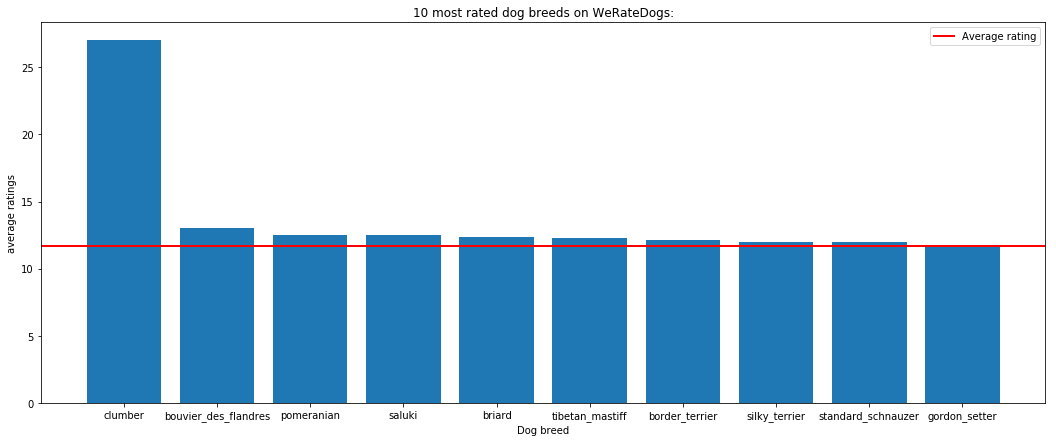

In [59]:
fig, ax = plt.subplots(figsize=(18, 7))
ax.set(xlabel='Dog breed', ylabel='average ratings',
       title='10 most rated dog breeds on WeRateDogs:')
ax.axhline(average_numerator, color='red', linewidth=2, label='Average rating')
plt.legend()
ax.bar(top_ten_ratings.index, top_ten_ratings.values)

Let's check how dog stage influence average ratings:

In [67]:
avg_ratings_per_dog_stage = df.groupby('dog_stage')['rating_numerator'].mean().sort_values(ascending=False)

<BarContainer object of 4 artists>

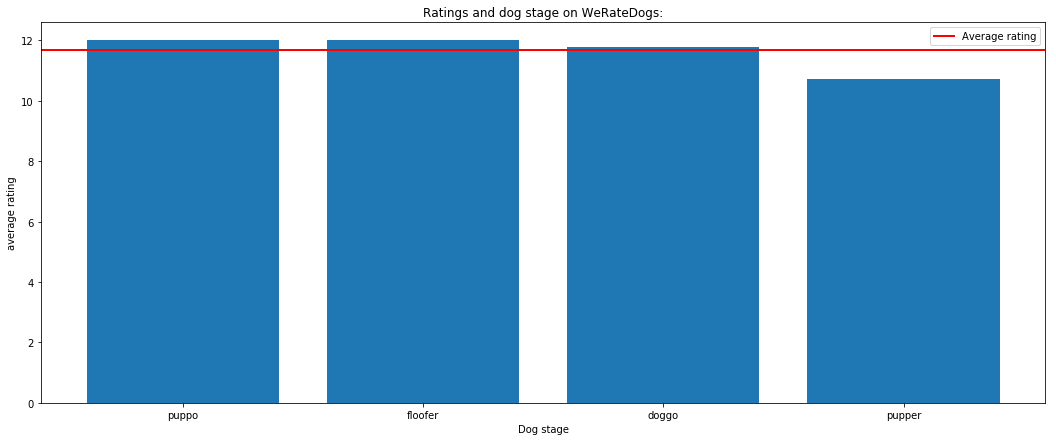

In [68]:
fig, ax = plt.subplots(figsize=(18, 7))
ax.set(xlabel='Dog stage', ylabel='average rating',
       title='Ratings and dog stage on WeRateDogs:')
ax.axhline(average_numerator, color='red', linewidth=2, label='Average rating')
plt.legend()
ax.bar(avg_ratings_per_dog_stage.index, avg_ratings_per_dog_stage.values)

Seems like Dogs in 'puppo', 'floofer'  stages tend to recive higher ratings. 

Top dog names:

In [70]:
df['name'].value_counts().sort_values(ascending=False)[:10]

Oliver     10
Cooper     10
Charlie    10
Lucy       10
Tucker      9
Penny       9
Winston     8
Sadie       8
Daisy       7
Lola        7
Name: name, dtype: int64

Most popular names are Oliver, Cooper, Charlie and Lucy.

Now let's move to feature engineering, let's add a new column to dataset called time_of_day with possible values morning, afternoon, evening and night. Based on tweet timestamp assign time of the day to each tweet. For this let's define a helper function:

In [94]:
# convert to datetimes
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [98]:
df.loc[0]['timestamp'].hour

16

In [103]:
morning = 6
afternoon = 12
evening = 18
night = 24
def get_time_of_day(row):
    current_hour = row['timestamp'].hour
    time_of_day = 'night'
    if afternoon > current_hour >= morning:
        time_of_day = 'morning'
    elif evening > current_hour >= afternoon:
        time_of_day = 'afternoon'
    elif night > current_hour >= evening:
        time_of_day = 'evening'
    return time_of_day

In [104]:
df['time_of_day'] = df.apply(get_time_of_day, axis=1)

In [117]:
tweets_per_time_of_day = df.groupby('time_of_day')['tweet_id'].count()
tweets_per_time_of_day

time_of_day
afternoon     446
evening       499
morning         3
night        1020
Name: tweet_id, dtype: int64

In [118]:
tweets_per_time_of_day['night']

1020

In [119]:
tweets_per_time_of_day.sum()

1968

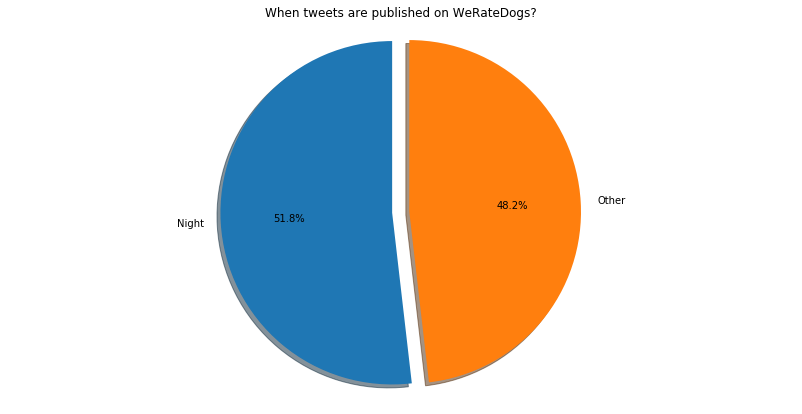

In [122]:
labels = 'Night', 'Other'
night_tweets_proportion = tweets_per_time_of_day['night'] / tweets_per_time_of_day.sum() 
sizes = [night_tweets_proportion, 1 - night_tweets_proportion]
explode = (0.1, 0)

fig, ax = plt.subplots(figsize=(14,7))
ax.set(title='When tweets are published on WeRateDogs?')
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')
plt.show()

Next step: simple model